In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import palette, ndim_models_order

In [8]:
dataset = "alyawarra"

In [9]:
df = pd.read_csv(f'../results/{dataset}_x_results_auc.csv', index_col=0)

# if degree_correction, add DC to model name
df['model'] = df.apply(lambda row: f"DC{row['model']}" if row['degree_correction'] else row['model'], axis=1)

df.head()

,auc,prauc,model,iteration,degree_correction
0,0.980425,0.312923,NAA,0,False
1,0.977393,0.282613,NSBM,0,False
2,0.978853,0.314744,DCNAA,0,True
3,0.976896,0.317285,DCNSBM,0,True
4,0.980811,0.282850,NAA,1,False


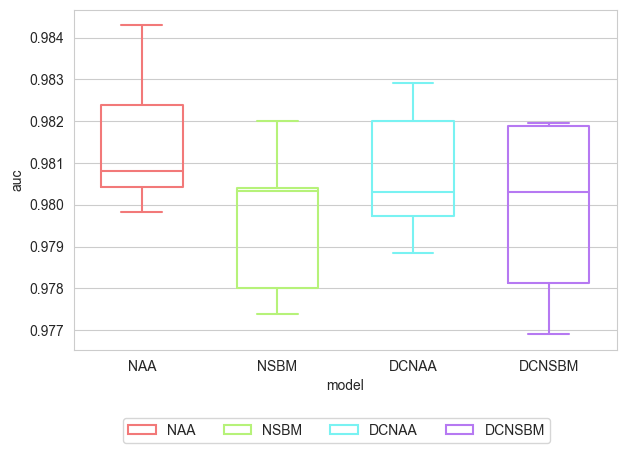

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

g = sns.boxplot(
    df,
    x = 'model',
    order=ndim_models_order,
    y='auc',
    hue='model',
    hue_order=ndim_models_order,
    palette=palette,
    fill=False,
    gap=.25,
    ax=ax,
    legend=True
)

# get the legend
handles, labels = g.get_legend_handles_labels()
g.legend_.remove()

fig.subplots_adjust(bottom=.2)

# plot the legend lower, center of the whole figure
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, 0))

# save figure
# plt.savefig(f'figures/{dataset}_boxplot.pdf', dpi=300)

plt.show()

In [11]:
df = pd.read_csv(f'../results/{dataset}_x_results_loss.csv')
# if degree_correction, add DC to model name
df['model'] = df.apply(lambda row: f"DC{row['model']}" if row['degree_correction'] else row['model'], axis=1)

df = df.groupby(['model', 'step']).mean().reset_index()
df.head()

,model,step,Unnamed: 0,loss,iteration,degree_correction
0,DCNAA,0,1000.0,48244.061719,2.0,1.0
1,DCNAA,20,1001.0,39989.879687,2.0,1.0
2,DCNAA,40,1002.0,34762.196094,2.0,1.0
3,DCNAA,60,1003.0,29515.336719,2.0,1.0
4,DCNAA,80,1004.0,24073.900000,2.0,1.0


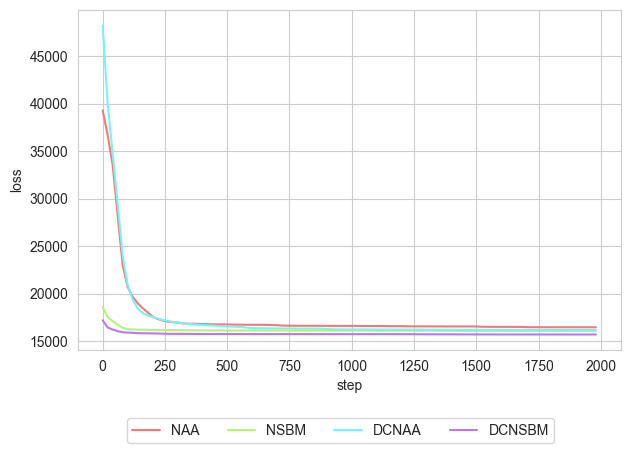

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))

g = sns.lineplot(
    df,
    x='step',
    y='loss',
    hue='model',
    hue_order=ndim_models_order,
    palette=palette,
    ax=ax
)

# get the legend
handles, labels = g.get_legend_handles_labels()
g.legend_.remove()

fig.subplots_adjust(bottom=.2)

# plot the legend lower, center of the whole figure
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, 0))

# save figure fig
# fig.savefig(f'figures/{dataset}_loss.pdf', dpi=300)

plt.show()